<a href="https://colab.research.google.com/github/datamatics121/Airbnb/blob/main/Datamatics_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name

Airbnb Booking Analysis

**Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Rahul Bisht
##### **Team Member 2 -** Kundan Kumar


# Project Summary

# GitHub Link -

# Importing Libraries,mounting and importing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
airbnb=pd.read_csv('/content/Airbnb NYC 2019.csv')

# Understanding Data

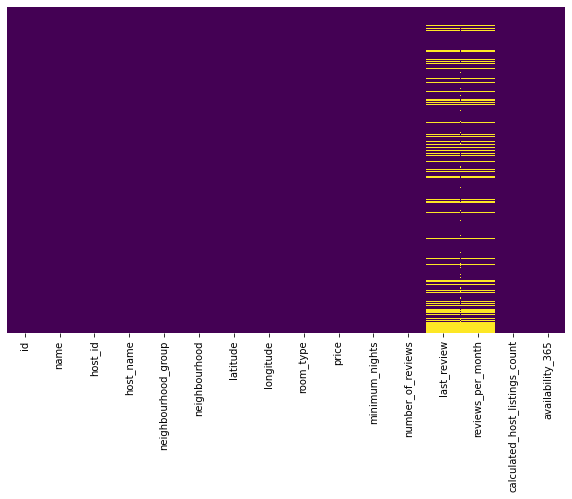

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(airbnb.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.show()

By seeing the heatmap we can clearly see that column number_of_reviews and reviews_per_month is having maximum null values.

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Also column  name and host_name is having some null values also,so firstly we have to handle these missing data


In [ ]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb[airbnb['availability_365']==0].shape[0]

17533

In [ ]:
airbnb[airbnb['price']==0].shape[0]

11

So we can see here that price and availablity of room of Airbnb data have minimum value is 0 that is not relevant.
Summarising in this Airbnb data we have to do data cleaning on following columns.
1. Name - we will fill null values of this column with name of most frequent name occured in this column.
2. host_name- we will replace host name with mode of host name in that column.
3. we will drop last review and review per month column as they have maximum null values.
4.As price column having 0 values are only 11 we will leave that rows in our analysis.
5.we can clearly notice that availiabilty column is having minimum value as well as 25th percentile is 0 but its not practicaly possible to exactly detect which apartments are having realy availabilty 0 days , so we will not alter this column as if we try to alter we can end up manipulating appartments which are really mostly busy (i.e 0 no. of days availibility)


# Data Cleaning

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb['name'].value_counts().head()

Hillside Hotel                      18
Home away from home                 17
New york Multi-unit building        16
Brooklyn Apartment                  12
Loft Suite @ The Box House Hotel    11
Name: name, dtype: int64

In [ ]:
airbnb['name'].fillna(value='Hillside Hotel',axis='index',inplace=True)

In [ ]:

airbnb['name'].value_counts().head()

Hillside Hotel                  34
Home away from home             17
New york Multi-unit building    16
Brooklyn Apartment              12
Private Room                    11
Name: name, dtype: int64

In [ ]:
airbnb['host_name'].mode()

0    Michael
dtype: object

In [ ]:
airbnb['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
airbnb['host_name'].fillna(value='Michael',axis='index',inplace=True)

In [ ]:
airbnb.drop(labels=['last_review','reviews_per_month'],axis='columns',inplace=True)

In [ ]:

airbnb[airbnb['number_of_reviews']==0].shape

(10052, 14)

In [ ]:
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
airbnb['number_of_reviews'].shape

(48895,)

In [ ]:
airbnb[airbnb['number_of_reviews']==0].shape

(10052, 14)

In [ ]:
airbnb[airbnb['number_of_reviews']!=0].shape

(38843, 14)

**As we can see there is no any null value in our dataset,we are good to go.**

# Data Analysis

As host name is not unique so to know the host name having maximum number of listings we have to use calculated_host_listings_count column

# 1.Which host has highest number of listings?

In [ ]:
main_hosts=airbnb[['host_name','neighbourhood_group','calculated_host_listings_count',]].sort_values(by='calculated_host_listings_count',ascending=False).drop_duplicates().head()
main_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
39773,Sonder (NYC),Manhattan,327
38701,Blueground,Manhattan,232
39275,Blueground,Brooklyn,232
13039,Kara,Manhattan,121
42840,Kazuya,Manhattan,103


**So we can clearly see here that Sonder,blueground would be the most important person for Airbnb as they have maximum number of listings.**

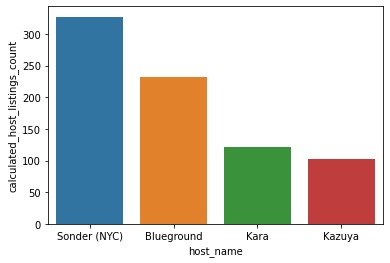

In [ ]:
hosts=main_hosts['host_name']
max_listed=main_hosts['calculated_host_listings_count']
sns.barplot(x=hosts,y=max_listed,data=main_hosts)
plt.show()


#   2.Which neighbourhood group and neighbourhood has highest number of listings?

In [ ]:
airbnb[['neighbourhood_group','neighbourhood']].value_counts().sort_values(ascending=False).reset_index(name='values').head(10)

,neighbourhood_group,neighbourhood,values
0,Brooklyn,Williamsburg,3920
1,Brooklyn,Bedford-Stuyvesant,3714
2,Manhattan,Harlem,2658
3,Brooklyn,Bushwick,2465
4,Manhattan,Upper West Side,1971
5,Manhattan,Hell's Kitchen,1958
6,Manhattan,East Village,1853
7,Manhattan,Upper East Side,1798
8,Brooklyn,Crown Heights,1564
9,Manhattan,Midtown,1545


In [ ]:
max_listed_ng=airbnb['neighbourhood_group'].value_counts()
max_listed_ng

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

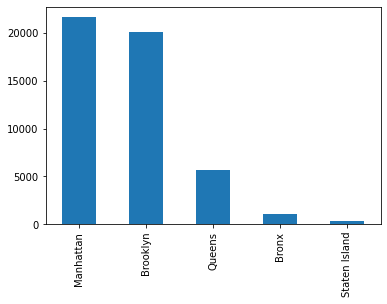

In [ ]:
max_listed_ng.plot(kind='bar')
plt.show()

In [ ]:
airbnb['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

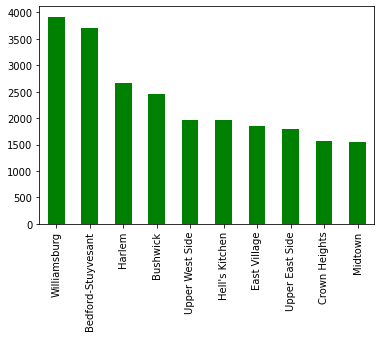

In [ ]:
max_listed_neighbour=airbnb['neighbourhood'].value_counts().head(10)
max_listed_neighbour.plot(kind='bar',color='g')
plt.show()

**As we can see here that Manhattan group has maximum number of listings while Williamburg stood on top in neighbourhood.**

# 3.Stay with respect to price of the room?

In [ ]:
airbnb=airbnb[airbnb['price']>0]

In [ ]:
price_matters=airbnb.groupby(['price'])['number_of_reviews'].max().reset_index()
price_matters.head(10)

,price,number_of_reviews
0,10,93
1,11,113
2,12,8
3,13,9
4,15,19
5,16,43
6,18,1
7,19,76
8,20,116
9,21,35


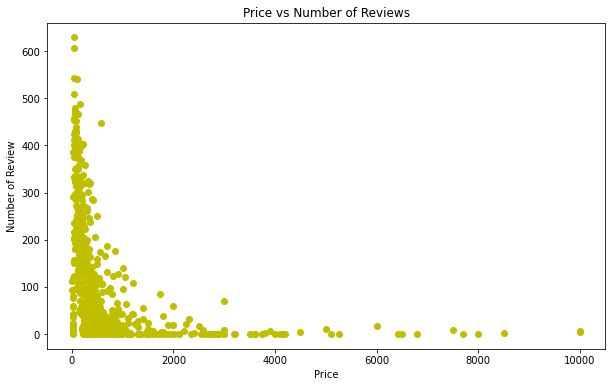

In [ ]:
price=price_matters['price']
reviews=price_matters['number_of_reviews']
fig = plt.figure(figsize = (10, 6))
plt.scatter(price,reviews,color='y')
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

**As we can see as price increase number of reviews(people's stays) decreases,so most people prefer low budget or affordable stay.**

# 4.Preference of guests with respect to room type

In [ ]:
airbnb['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

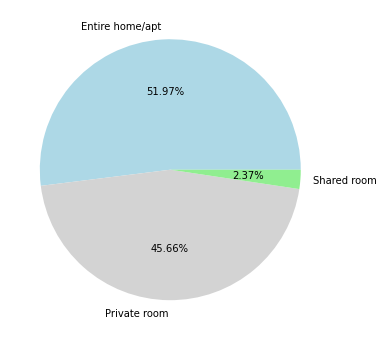

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(airbnb['room_type'].value_counts(), labels=airbnb['room_type'].value_counts().index, colors=['lightblue','lightgrey','lightgreen'], autopct='%.02f%%')
plt.show()

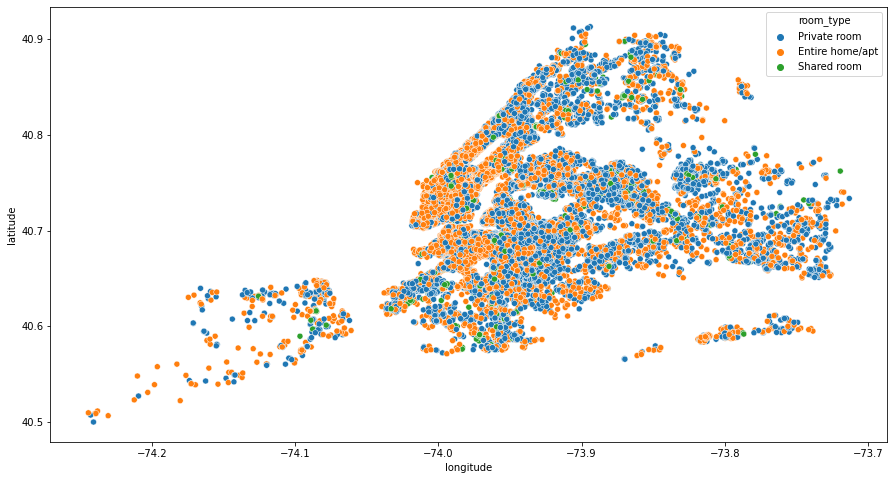

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=airbnb['longitude'],y=airbnb['latitude'], hue=airbnb['room_type'])
plt.show()

As we can see that maximum numbers of room are Entire home/Apartment and Private room there are only few shared rooms .
So mostly host prefer to give Entire home/Appartment or Private Rooms rather than Shared rooms.

# 5.Price relation with respect to location

In [ ]:
airbnb=airbnb[airbnb['price']>0]
location_price=airbnb.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).reset_index()
location_price

,neighbourhood_group,price
0,Manhattan,196.884903
1,Brooklyn,124.438915
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.577064


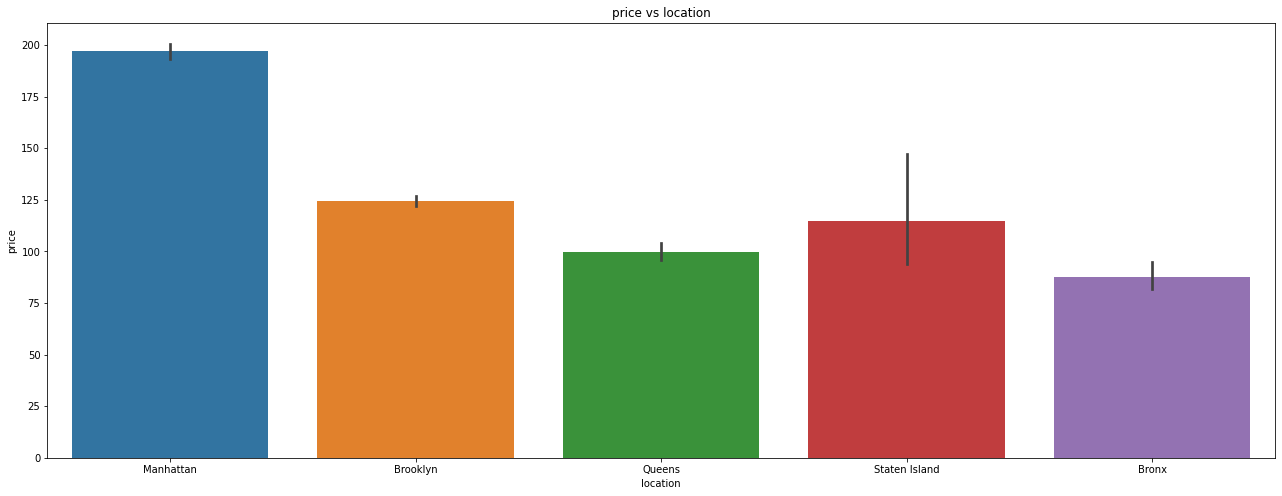

In [ ]:
plt.figure(figsize=(22,8))
location=location_price['neighbourhood_group']
price=location_price['price']
sns.barplot(x=location,y=price)
plt.title('price vs location')
plt.xlabel('location')
plt.ylabel('price')
plt.show()

In [ ]:
neighbourhood_price=airbnb.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index().head(10)
neighbourhood_price

,neighbourhood,price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Tribeca,490.638418
3,Sea Gate,487.857143
4,Riverdale,442.090909
5,Prince's Bay,409.500000
6,Battery Park City,367.557143
7,Flatiron District,341.925000
8,Randall Manor,336.000000
9,NoHo,295.717949


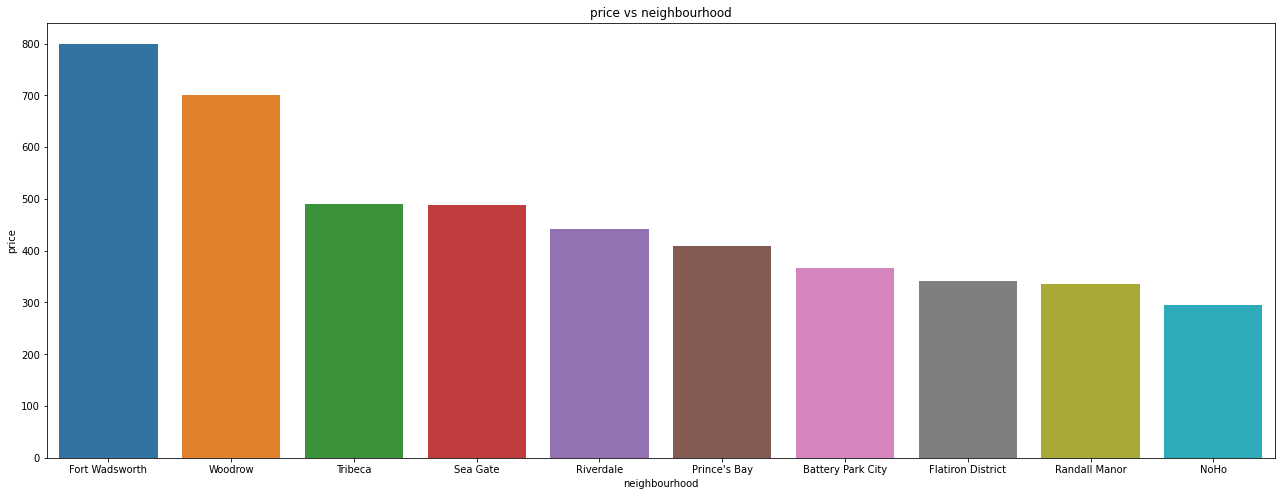

In [ ]:
plt.figure(figsize=(22,8))
neighbourhood=neighbourhood_price['neighbourhood']
price=neighbourhood_price['price']
sns.barplot(x=neighbourhood,y=price)
plt.title('price vs neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('price')
plt.show()

**As we can see here,Manhattan is costliest among all others neighbourhood groups while Fort wadsworth is costliest among neighbourhood.**

#  6.Distribution of room types in various location

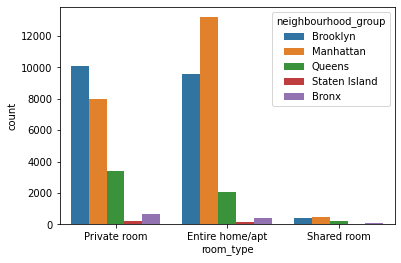

In [ ]:
sns.countplot(x='room_type',data=airbnb,hue='neighbourhood_group')
plt.show()

**As we can see Manhattan is having maximum number of entire home/apt and shared room,Brooklyn is having maximum number of private room.**

# 7.People preference to stay with respect to room type?

In [ ]:
room_stay=airbnb.groupby('room_type')['minimum_nights'].count().reset_index()
room_stay

,room_type,minimum_nights
0,Entire home/apt,25407
1,Private room,22319
2,Shared room,1158


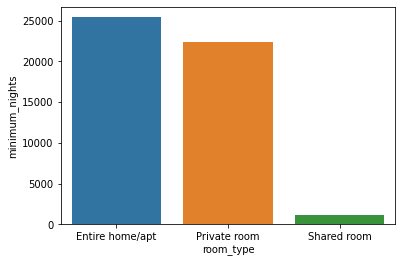

In [ ]:
sns.barplot(x=room_stay['room_type'],y=room_stay['minimum_nights'],data=room_stay)
plt.show()

**As we can see that people are prefering entire home/apartment and private room most while shared rooms are least prefered.**

# 8.Preference of room type  with respect to Location

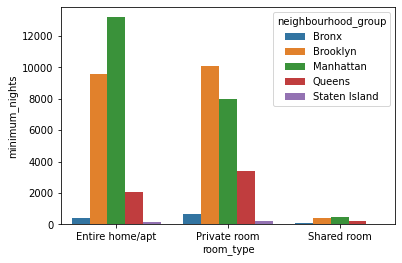

In [ ]:
location_stay=airbnb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
room_type=location_stay['room_type']
stay_duration=location_stay['minimum_nights']
sns.barplot(x=room_type,y=stay_duration,data=location_stay,hue='neighbourhood_group')
plt.show()

**We can clearly see here that entire home/apartment is mostly prefered in Manhattan while private room are most prefered in brooklyn.**

# 9.Which room type is more affordable(Room type vs average price

In [ ]:
airbnb.groupby('room_type')['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,211.810918
1,Private room,89.809131
2,Shared room,70.248705


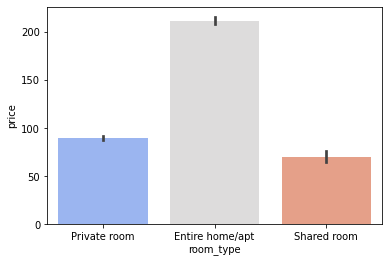

In [ ]:
sns.barplot(x='room_type',y='price',data=airbnb,palette='coolwarm')
plt.show()

**Price of entire home/apt is higher as compared to private room and shared room**

# 10.Room type with respect to price in various location

In [ ]:
airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack(1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


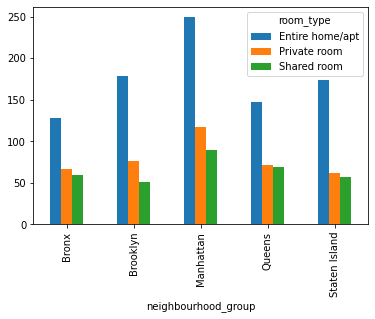

In [ ]:
airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack(1).plot(kind='bar')

**As we can see here that Manhattan prices for each room types are higher than all other neighbourhood group**

# 11.Relation between availablity of rooms and neighbourhood group

In [ ]:
availablity_location=airbnb.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
availablity_location

,neighbourhood_group,availability_365
0,Bronx,165.758937
1,Brooklyn,100.232292
2,Manhattan,111.979410
3,Queens,144.451818
4,Staten Island,199.678284


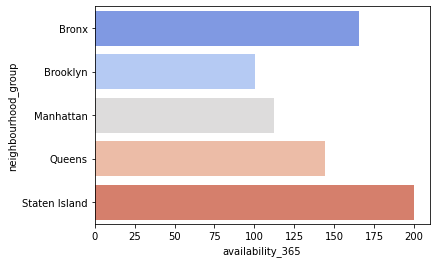

In [ ]:
ng=availablity_location['neighbourhood_group']
availablity_year=availablity_location['availability_365']
sns.barplot(x=availablity_year,y=ng,data=availablity_location,palette='coolwarm')
plt.show()

**As we can see State Island is having highest availablity over 365 days followed by bronx while Brooklyn and Manhattan is having least availablity.**

# 12.Room type in comparision to highest availablity

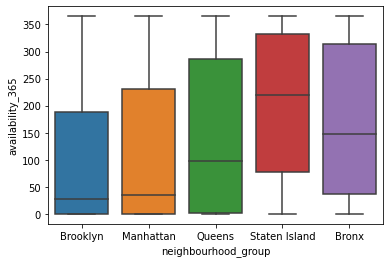

In [ ]:
sns.boxplot(x='neighbourhood_group',y='availability_365',data=airbnb)

In [ ]:
airbnb.groupby('room_type')['availability_365'].mean().reset_index()

,room_type,availability_365
0,Entire home/apt,111.926241
1,Private room,111.203638
2,Shared room,161.873057


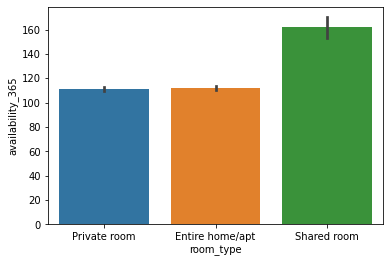

In [ ]:
sns.barplot(x='room_type',y='availability_365',data=airbnb)
plt.show()

**So Shared room is having high availablity as compared to entire room and private room**

# 13.Describing the minimum night spend in the neighbourhood_group

In [ ]:
availablity_location=airbnb.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()
availablity_location

,neighbourhood_group,minimum_nights
0,Bronx,4.560953
1,Brooklyn,6.056556
2,Manhattan,8.579151
3,Queens,5.181433
4,Staten Island,4.831099


In [ ]:
ng=availablity_location['neighbourhood_group']
availablity_night=['minimum_nights']

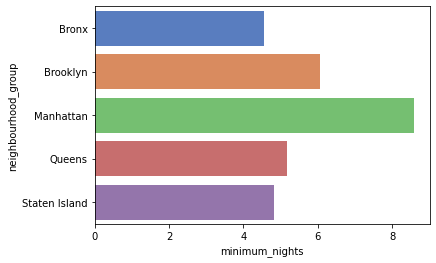

In [ ]:
sns.barplot(y='neighbourhood_group',x='minimum_nights',data=availablity_location,palette='muted')
plt.show()

The barplots clearly shows that Manhattan has the highst stay in the locality

# 14.The Host having the Highest sales/Turnover in the locality

In [10]:
airbnb=airbnb.loc[(airbnb['price']>0) & (airbnb['minimum_nights']!=0)]
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [16]:
airbnb['turnover']=airbnb['price']*airbnb['minimum_nights']
Highest_turnover_airbnb=airbnb.groupby(['host_name','neighbourhood_group'])['turnover'].sum().reset_index().sort_values(by='turnover',ascending=False).head(10)
Highest_turnover_airbnb


,host_name,neighbourhood_group,turnover
1833,Blueground,Manhattan,2240880
6513,Jenny,Manhattan,1196340
7274,Kara,Manhattan,1170227
768,Amy,Manhattan,1120953
7401,Kathrine,Queens,1000000
13215,Sonder (NYC),Manhattan,950453
6003,Iveta,Queens,857750
10729,Noelle,Queens,731050
11398,Pranjal,Manhattan,664320
6539,Jeremy & Laura,Manhattan,601800


Blueground from neighbourhood Manhattan has the highest sales/turnover in the locality.

# **Conclusion**

1.Sonder,blueground would be the most important person for Airbnb as they have maximum number of listings.

2.Manhattan group has maximum number of listings while Williamburg stood on top in neighbourhood.

3.As price increase number of reviews(people's stays) decreases,so most people prefer low budget or affordable stay.

4.maximum numbers of room are Entire home/Apartment and Private room there are only few shared rooms . So mostly host prefer to give Entire home/Appartment or Private Rooms rather than Shared rooms.

5.Manhattan is costliest among all others neighbourhood groups while Fort wadsworth is costliest among neighbourhood.

6.People are prefering entire home/apartment and private room most while shared rooms are least prefered.

7.entire home/apartment is mostly prefered in Manhattan while private room are most prefered in brooklyn.

8.entire home/apartment is mostly prefered in Manhattan while private room are most prefered in brooklyn.

9.Price of entire home/apt is higher as compared to private room and shared room

10.Manhattan prices for each room types are higher than all other neighbourhood group.

11.State Island is having highest availablity over 365 days followed by bronx while Brooklyn and Manhattan is having least availablity.

12.Shared room is having high availablity as compared to entire room and private room.

13.Manhattan has the highst stay in the locality.



